In [514]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns

In [515]:
df = pd.read_csv('V_5_종목선정(증가율추가).csv', encoding = 'cp949')

In [516]:
df

,회사명,거래소코드,회계년도,매출액증가율(IFRS),순이익증가율(IFRS),매출액정상영업이익률(IFRS),자기자본순이익률(IFRS),총자본순이익률(IFRS),부채비율(IFRS),차입금의존도(IFRS),자본금(*)(IFRS),* (정상)영업손익(보고서기재)(IFRS),당기순이익(손실)(IFRS),상장일,수정주가(종가)증가율
0,(주)BNK금융지주,138930,2018,58.47,94.24,67.69,1.39,1.10,26.21,NaN,1.629676e+09,0.0,65221574.0,2011-03-30,54.600000
1,(주)BNK금융지주,138930,2019,-1.67,-7.69,63.78,1.24,0.98,26.66,NaN,1.629676e+09,0.0,60204223.0,2011-03-30,54.600000
2,(주)BNK금융지주,138930,2020,43.39,75.14,77.64,2.12,1.69,24.26,NaN,1.629676e+09,0.0,105438694.0,2011-03-30,54.600000
3,(주)BNK금융지주,138930,2021,102.40,129.61,88.23,4.65,3.72,25.67,NaN,1.629676e+09,0.0,242096740.0,2011-03-30,54.600000
4,(주)CMG제약,58820,2018,22.67,46.10,5.50,2.35,2.12,12.65,0.00,5.444362e+07,1323711.0,2391366.0,2001-08-31,32.578616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8153,신성통상(주),5390,2021,17.54,559.25,7.01,12.21,3.45,242.52,128.42,7.185420e+07,84084206.0,29430004.0,1975-12-05,111.461318
8154,한국주철관공업(주),970,2020,-9.95,3.06,4.39,1.52,1.28,14.88,2.30,1.200000e+07,2552676.0,3327881.0,1969-12-12,14.827586
8155,한국주철관공업(주),970,2021,-9.66,317.72,6.38,6.23,5.35,17.80,0.90,1.200000e+07,3348595.0,13901378.0,1969-12-12,14.827586
8156,효성오앤비(주),97870,2020,6.62,7.08,6.17,2.46,2.19,15.68,3.94,4.245000e+06,1777583.0,1483555.0,2008-04-08,75.273865


## 칼럼명
* 회사명 = company_name
* 종목코드   = ticker
* 회계년도 = fiscal_year
* 매출액증가율(IFRS) = sales_growth_rate
* 순이익증가율(IFRS) = net_profit_growth_rate   
* 매출액정상영업이익률(IFRS) = operating_profit_rate 
* 자기자본순이익률(IFRS) = roe   
* 총자본순이익률(IFRS)   = roa
* 부채비율(IFRS) = debt_ratio
* 차입금의존도(IFRS) = tbp(Total Borrowings And Bonds Payable to Total Assets)
* 자본금(*)(IFRS) = equity_capital
* (정상)영업손익(보고서기재)(IFRS) = operating_profit
* 당기순이익(손실)(IFRS) = net_profit   
* 상장일 = listing_date


In [517]:
#칼럼 이름 바꾸기
df.rename(columns = {"회사명":"company_name","거래소코드":"ticker","회계년도":"fiscal_year","매출액증가율(IFRS)":"sales_growth_rate",
                     "순이익증가율(IFRS)":"net_profit_growth_rate","매출액정상영업이익률(IFRS)": "operating_profit_rate",
                     "자기자본순이익률(IFRS)":"roe","총자본순이익률(IFRS)":"roa","부채비율(IFRS)":"debt_ratio",
                     "차입금의존도(IFRS)":"tbp","총자본회전률(IFRS)":"equity_capital","자본금(*)(IFRS)":"equity_capital","* (정상)영업손익(보고서기재)(IFRS)":"operating_profit",
                     "당기순이익(손실)(IFRS)":"net_profit","상장일":"listing_date","수정주가(종가)증가율":"Close_ratio"}, inplace = True)

In [518]:
# df['equity_capital'] = df['equity_capital'].str.replace(',','')
df['equity_capital'] =df['equity_capital'].astype('float64')
# df['operating_profit'] = df['operating_profit'].str.replace(',','')
df['operating_profit'] =df['operating_profit'].astype('float64')
df['net_profit'] =df['net_profit'].astype('float64')

In [519]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8158 entries, 0 to 8157
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   company_name            8158 non-null   object 
 1   ticker                  8158 non-null   int64  
 2   fiscal_year             8158 non-null   int64  
 3   sales_growth_rate       7745 non-null   float64
 4   net_profit_growth_rate  7745 non-null   float64
 5   operating_profit_rate   7745 non-null   float64
 6   roe                     7745 non-null   float64
 7   roa                     7745 non-null   float64
 8   debt_ratio              7745 non-null   float64
 9   tbp                     7430 non-null   float64
 10  equity_capital          8107 non-null   float64
 11  operating_profit        7864 non-null   float64
 12  net_profit              8103 non-null   float64
 13  listing_date            8158 non-null   object 
 14  Close_ratio             7939 non-null   

In [520]:
## 회계년도 19년 이전 삭제
df['fiscal_year'] = df['fiscal_year'].astype(int)
df_c = df[df['fiscal_year'] > 2019]

In [521]:
df_c

,company_name,ticker,fiscal_year,sales_growth_rate,net_profit_growth_rate,operating_profit_rate,roe,roa,debt_ratio,tbp,equity_capital,operating_profit,net_profit,listing_date,Close_ratio
2,(주)BNK금융지주,138930,2020,43.39,75.14,77.64,2.12,1.69,24.26,NaN,1.629676e+09,0.0,105438694.0,2011-03-30,54.600000
3,(주)BNK금융지주,138930,2021,102.40,129.61,88.23,4.65,3.72,25.67,NaN,1.629676e+09,0.0,242096740.0,2011-03-30,54.600000
6,(주)CMG제약,58820,2020,10.63,26.36,2.21,1.46,1.32,9.13,0.36,6.944612e+07,672847.0,2104386.0,2001-08-31,32.578616
7,(주)CMG제약,58820,2021,8.55,-41.78,2.07,0.67,0.62,7.83,0.35,6.944612e+07,686048.0,1225225.0,2001-08-31,32.578616
10,(주)DB하이텍,990,2020,25.30,120.97,30.32,16.65,9.77,51.79,15.14,2.225558e+08,141730846.0,109656599.0,1975-12-12,116.291161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8153,신성통상(주),5390,2021,17.54,559.25,7.01,12.21,3.45,242.52,128.42,7.185420e+07,84084206.0,29430004.0,1975-12-05,111.461318
8154,한국주철관공업(주),970,2020,-9.95,3.06,4.39,1.52,1.28,14.88,2.30,1.200000e+07,2552676.0,3327881.0,1969-12-12,14.827586
8155,한국주철관공업(주),970,2021,-9.66,317.72,6.38,6.23,5.35,17.80,0.90,1.200000e+07,3348595.0,13901378.0,1969-12-12,14.827586
8156,효성오앤비(주),97870,2020,6.62,7.08,6.17,2.46,2.19,15.68,3.94,4.245000e+06,1777583.0,1483555.0,2008-04-08,75.273865


In [522]:
#상장일 20200601 작은거 삭제 상장일 제거
df_c['listing_date'] = df_c['listing_date'].str.replace('-','')
df_c['listing_date'] = df_c['listing_date'].astype(int)
df_c = df_c[df_c['listing_date'] < 20190101]

C:\Users\mk\AppData\Local\Temp/ipykernel_17032/2996339973.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c['listing_date'] = df_c['listing_date'].str.replace('-','')
C:\Users\mk\AppData\Local\Temp/ipykernel_17032/2996339973.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c['listing_date'] = df_c['listing_date'].astype(int)


In [523]:
df_c

,company_name,ticker,fiscal_year,sales_growth_rate,net_profit_growth_rate,operating_profit_rate,roe,roa,debt_ratio,tbp,equity_capital,operating_profit,net_profit,listing_date,Close_ratio
2,(주)BNK금융지주,138930,2020,43.39,75.14,77.64,2.12,1.69,24.26,NaN,1.629676e+09,0.0,105438694.0,20110330,54.600000
3,(주)BNK금융지주,138930,2021,102.40,129.61,88.23,4.65,3.72,25.67,NaN,1.629676e+09,0.0,242096740.0,20110330,54.600000
6,(주)CMG제약,58820,2020,10.63,26.36,2.21,1.46,1.32,9.13,0.36,6.944612e+07,672847.0,2104386.0,20010831,32.578616
7,(주)CMG제약,58820,2021,8.55,-41.78,2.07,0.67,0.62,7.83,0.35,6.944612e+07,686048.0,1225225.0,20010831,32.578616
10,(주)DB하이텍,990,2020,25.30,120.97,30.32,16.65,9.77,51.79,15.14,2.225558e+08,141730846.0,109656599.0,19751212,116.291161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8153,신성통상(주),5390,2021,17.54,559.25,7.01,12.21,3.45,242.52,128.42,7.185420e+07,84084206.0,29430004.0,19751205,111.461318
8154,한국주철관공업(주),970,2020,-9.95,3.06,4.39,1.52,1.28,14.88,2.30,1.200000e+07,2552676.0,3327881.0,19691212,14.827586
8155,한국주철관공업(주),970,2021,-9.66,317.72,6.38,6.23,5.35,17.80,0.90,1.200000e+07,3348595.0,13901378.0,19691212,14.827586
8156,효성오앤비(주),97870,2020,6.62,7.08,6.17,2.46,2.19,15.68,3.94,4.245000e+06,1777583.0,1483555.0,20080408,75.273865


In [524]:
df_c = df_c.drop("listing_date",axis=1)

In [525]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3851 entries, 2 to 8157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   company_name            3851 non-null   object 
 1   ticker                  3851 non-null   int64  
 2   fiscal_year             3851 non-null   int32  
 3   sales_growth_rate       3827 non-null   float64
 4   net_profit_growth_rate  3827 non-null   float64
 5   operating_profit_rate   3827 non-null   float64
 6   roe                     3827 non-null   float64
 7   roa                     3827 non-null   float64
 8   debt_ratio              3827 non-null   float64
 9   tbp                     3695 non-null   float64
 10  equity_capital          3829 non-null   float64
 11  operating_profit        3773 non-null   float64
 12  net_profit              3827 non-null   float64
 13  Close_ratio             3851 non-null   float64
dtypes: float64(11), int32(1), int64(1), obje

In [526]:
# 스팩주 삭제
df_c = df_c.drop(df_c[df_c['company_name'].str.contains('기업인수목적')].index, axis=0)

In [527]:
# 스팩주 없는지 확인
df_c[df_c['company_name'].str.contains('기업인수목적')]

,company_name,ticker,fiscal_year,sales_growth_rate,net_profit_growth_rate,operating_profit_rate,roe,roa,debt_ratio,tbp,equity_capital,operating_profit,net_profit,Close_ratio


In [528]:
df_c

,company_name,ticker,fiscal_year,sales_growth_rate,net_profit_growth_rate,operating_profit_rate,roe,roa,debt_ratio,tbp,equity_capital,operating_profit,net_profit,Close_ratio
2,(주)BNK금융지주,138930,2020,43.39,75.14,77.64,2.12,1.69,24.26,NaN,1.629676e+09,0.0,105438694.0,54.600000
3,(주)BNK금융지주,138930,2021,102.40,129.61,88.23,4.65,3.72,25.67,NaN,1.629676e+09,0.0,242096740.0,54.600000
6,(주)CMG제약,58820,2020,10.63,26.36,2.21,1.46,1.32,9.13,0.36,6.944612e+07,672847.0,2104386.0,32.578616
7,(주)CMG제약,58820,2021,8.55,-41.78,2.07,0.67,0.62,7.83,0.35,6.944612e+07,686048.0,1225225.0,32.578616
10,(주)DB하이텍,990,2020,25.30,120.97,30.32,16.65,9.77,51.79,15.14,2.225558e+08,141730846.0,109656599.0,116.291161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8153,신성통상(주),5390,2021,17.54,559.25,7.01,12.21,3.45,242.52,128.42,7.185420e+07,84084206.0,29430004.0,111.461318
8154,한국주철관공업(주),970,2020,-9.95,3.06,4.39,1.52,1.28,14.88,2.30,1.200000e+07,2552676.0,3327881.0,14.827586
8155,한국주철관공업(주),970,2021,-9.66,317.72,6.38,6.23,5.35,17.80,0.90,1.200000e+07,3348595.0,13901378.0,14.827586
8156,효성오앤비(주),97870,2020,6.62,7.08,6.17,2.46,2.19,15.68,3.94,4.245000e+06,1777583.0,1483555.0,75.273865


In [529]:
# tbp 차입금의존도 na -> 0 
df_c['tbp']= df_c['tbp'].fillna(0.0)

In [530]:
# sales_growth_rate 빈 값들 삭제
df_c = df_c.drop(df_c[df_c['sales_growth_rate'].isnull()].index,axis=0)

In [531]:
df_c[df_c['sales_growth_rate'].isnull()]

,company_name,ticker,fiscal_year,sales_growth_rate,net_profit_growth_rate,operating_profit_rate,roe,roa,debt_ratio,tbp,equity_capital,operating_profit,net_profit,Close_ratio


In [532]:
df_c

,company_name,ticker,fiscal_year,sales_growth_rate,net_profit_growth_rate,operating_profit_rate,roe,roa,debt_ratio,tbp,equity_capital,operating_profit,net_profit,Close_ratio
2,(주)BNK금융지주,138930,2020,43.39,75.14,77.64,2.12,1.69,24.26,0.00,1.629676e+09,0.0,105438694.0,54.600000
3,(주)BNK금융지주,138930,2021,102.40,129.61,88.23,4.65,3.72,25.67,0.00,1.629676e+09,0.0,242096740.0,54.600000
6,(주)CMG제약,58820,2020,10.63,26.36,2.21,1.46,1.32,9.13,0.36,6.944612e+07,672847.0,2104386.0,32.578616
7,(주)CMG제약,58820,2021,8.55,-41.78,2.07,0.67,0.62,7.83,0.35,6.944612e+07,686048.0,1225225.0,32.578616
10,(주)DB하이텍,990,2020,25.30,120.97,30.32,16.65,9.77,51.79,15.14,2.225558e+08,141730846.0,109656599.0,116.291161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8153,신성통상(주),5390,2021,17.54,559.25,7.01,12.21,3.45,242.52,128.42,7.185420e+07,84084206.0,29430004.0,111.461318
8154,한국주철관공업(주),970,2020,-9.95,3.06,4.39,1.52,1.28,14.88,2.30,1.200000e+07,2552676.0,3327881.0,14.827586
8155,한국주철관공업(주),970,2021,-9.66,317.72,6.38,6.23,5.35,17.80,0.90,1.200000e+07,3348595.0,13901378.0,14.827586
8156,효성오앤비(주),97870,2020,6.62,7.08,6.17,2.46,2.19,15.68,3.94,4.245000e+06,1777583.0,1483555.0,75.273865


In [533]:
# 순이익증가율 2021 기중 - 삭제
# df_ccc = df_c[df_c['net_profit'] < 0]

In [534]:
# df_ccc

In [535]:
# df_c =df_c.drop(['level_0','index'],axis=1)

In [536]:
# 회사명 리스트뽑기
Enterprise_list = df_c['company_name'].unique()

In [537]:
Enterprise_list

array(['(주)BNK금융지주', '(주)CMG제약', '(주)DB하이텍', ..., '메이슨캐피탈(주)', '신성통상(주)',
       '효성오앤비(주)'], dtype=object)

In [538]:
############################# 테스트

In [539]:
################################################################################

In [540]:
df_c[df_c['sales_growth_rate'].isnull()]

,company_name,ticker,fiscal_year,sales_growth_rate,net_profit_growth_rate,operating_profit_rate,roe,roa,debt_ratio,tbp,equity_capital,operating_profit,net_profit,Close_ratio


In [541]:
df_c[df_c['operating_profit'].isnull()]

,company_name,ticker,fiscal_year,sales_growth_rate,net_profit_growth_rate,operating_profit_rate,roe,roa,debt_ratio,tbp,equity_capital,operating_profit,net_profit,Close_ratio
162,(주)국전약품,307750,2020,0.00,0.00,0.00,-0.42,-0.39,8.44,0.0,5.010000e+05,NaN,-40165.0,1737.170838
561,(주)더블유에스아이,299170,2020,0.00,0.00,0.00,-0.21,-0.18,18.71,0.0,4.330000e+05,NaN,-17724.0,947.677076
1292,(주)비투엔,307870,2021,0.00,0.00,0.00,-0.30,-0.27,10.60,0.0,4.750000e+05,NaN,-26555.0,9.725686
1293,(주)비투엔,307870,2020,0.00,0.00,0.00,0.59,0.53,10.40,0.0,4.750000e+05,NaN,52921.0,9.725686
2359,(주)에이티넘인베스트먼트,21080,2020,-22.71,-25.34,41.50,3.21,3.09,3.76,0.0,2.400000e+07,NaN,2502041.0,181.993569
2360,(주)에이티넘인베스트먼트,21080,2021,118.28,249.50,68.81,9.99,9.49,6.50,0.0,2.400000e+07,NaN,8744670.0,181.993569
2497,(주)엔피,291230,2020,0.00,-38.71,0.00,0.36,0.33,6.72,0.0,7.550000e+05,NaN,50342.0,209.226933
2498,(주)엔피,291230,2021,0.00,0.00,0.00,-0.28,-0.26,6.73,0.0,7.550000e+05,NaN,-39991.0,209.226933
2722,(주)오하임아이엔티,309930,2020,0.00,0.00,0.00,0.15,0.14,9.12,0.0,4.590000e+05,NaN,12405.0,698.709917
2758,(주)와이즈버즈,273060,2020,0.00,-65.51,0.00,0.20,0.19,6.77,0.0,7.510000e+05,NaN,28655.0,552.338482


In [542]:
df_c =df_c.reset_index()

In [543]:
df_c =df_c.drop(['index'],axis=1)

In [544]:
df_c

,company_name,ticker,fiscal_year,sales_growth_rate,net_profit_growth_rate,operating_profit_rate,roe,roa,debt_ratio,tbp,equity_capital,operating_profit,net_profit,Close_ratio
0,(주)BNK금융지주,138930,2020,43.39,75.14,77.64,2.12,1.69,24.26,0.00,1.629676e+09,0.0,105438694.0,54.600000
1,(주)BNK금융지주,138930,2021,102.40,129.61,88.23,4.65,3.72,25.67,0.00,1.629676e+09,0.0,242096740.0,54.600000
2,(주)CMG제약,58820,2020,10.63,26.36,2.21,1.46,1.32,9.13,0.36,6.944612e+07,672847.0,2104386.0,32.578616
3,(주)CMG제약,58820,2021,8.55,-41.78,2.07,0.67,0.62,7.83,0.35,6.944612e+07,686048.0,1225225.0,32.578616
4,(주)DB하이텍,990,2020,25.30,120.97,30.32,16.65,9.77,51.79,15.14,2.225558e+08,141730846.0,109656599.0,116.291161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3822,신성통상(주),5390,2021,17.54,559.25,7.01,12.21,3.45,242.52,128.42,7.185420e+07,84084206.0,29430004.0,111.461318
3823,한국주철관공업(주),970,2020,-9.95,3.06,4.39,1.52,1.28,14.88,2.30,1.200000e+07,2552676.0,3327881.0,14.827586
3824,한국주철관공업(주),970,2021,-9.66,317.72,6.38,6.23,5.35,17.80,0.90,1.200000e+07,3348595.0,13901378.0,14.827586
3825,효성오앤비(주),97870,2020,6.62,7.08,6.17,2.46,2.19,15.68,3.94,4.245000e+06,1777583.0,1483555.0,75.273865


In [545]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3827 entries, 0 to 3826
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   company_name            3827 non-null   object 
 1   ticker                  3827 non-null   int64  
 2   fiscal_year             3827 non-null   int32  
 3   sales_growth_rate       3827 non-null   float64
 4   net_profit_growth_rate  3827 non-null   float64
 5   operating_profit_rate   3827 non-null   float64
 6   roe                     3827 non-null   float64
 7   roa                     3827 non-null   float64
 8   debt_ratio              3827 non-null   float64
 9   tbp                     3827 non-null   float64
 10  equity_capital          3827 non-null   float64
 11  operating_profit        3773 non-null   float64
 12  net_profit              3827 non-null   float64
 13  Close_ratio             3827 non-null   float64
dtypes: float64(11), int32(1), int64(1), obje

In [546]:
# 20, 21 년 데이터 하나라도 없는 회사는 삭제
del_Enterprise = []
for ename in Enterprise_list:
    compare_y = df_c[df_c['company_name'] == ename ]
    print(compare_y.shape)
    if compare_y.shape == (1,13):
        del_Enterprise.append(ename)

(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)


(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)
(2, 14)


In [547]:
del_Enterprise

[]

In [548]:
for dename in del_Enterprise:
    df_c = df_c.drop(df_c[df_c['company_name'] == dename ].index, axis=0)

In [549]:
df_c =df_c.reset_index()
df_c =df_c.drop(['index'],axis=1)

In [550]:
df_c['ticker'] = df_c['ticker'].astype(int)
df_c['ticker'] = df_c['ticker'].astype(str)

In [551]:
# 시가총액 자르기
market_df = pd.read_csv('전종목시세_20210630.csv', encoding = 'cp949')

In [552]:
market_df

,종목코드,종목명,시가총액
0,060310,3S,"141,822,187,345"
1,095570,AJ네트웍스,"284,679,553,600"
2,006840,AK홀딩스,"431,870,488,600"
3,054620,APS홀딩스,"322,228,691,800"
4,265520,AP시스템,"459,747,207,250"
...,...,...,...
2568,000547,흥국화재2우B,"4,869,120,000"
2569,000545,흥국화재우,"8,678,400,000"
2570,003280,흥아해운,"30,117,000,222"
2571,037440,희림,"113,746,620,750"


In [553]:
market_df['시가총액'] = market_df['시가총액'].str.replace(',','')
market_df['시가총액'] = market_df['시가총액'].astype('float64') / 1000000.0 # 너무 커 100만 단위로 변경
market_df =  market_df[market_df['시가총액'] < 20000.0]

In [554]:
market_df

,종목코드,종목명,시가총액
18,011155,CJ씨푸드1우,8800.0000
30,367340,DB금융스팩8호,12826.0000
31,367360,DB금융스팩9호,10236.6000
35,000995,DB하이텍1우,13646.3940
76,335870,IBKS제12호스팩,6864.0000
...,...,...,...
2464,340440,한화플러스제1호스팩,10102.9500
2489,004565,현대비앤지스틸우,10457.9104
2555,212310,휴벡셀,13669.1834
2568,000547,흥국화재2우B,4869.1200


In [555]:
del_list = market_df['종목코드'].values

In [556]:
del_list

array(['011155', '367340', '367360', '000995', '335870', '351340',
       '351320', '373200', '001067', '001065', '016385', '004255',
       '307070', '337450', '340350', '001745', '001515', '038340',
       '012205', '183410', '355150', '331520', '014285', '002995',
       '004545', '244880', '288490', '008355', '005725', '090355',
       '000325', '271850', '00806K', '178600', '084695', '332290',
       '336570', '369370', '006345', '114920', '021045', '348840',
       '005965', '001527', '001529', '001525', '014825', '285770',
       '033600', '179720', '08537M', '236340', '267060', '353490',
       '328380', '208890', '225850', '281310', '199290', '206950',
       '215050', '210120', '266170', '145995', '307870', '329560',
       '004415', '014915', '004985', '053110', '032685', '185190',
       '033790', '158310', '323280', '344050', '009275', '333050',
       '366330', '217320', '236030', '245450', '058220', '149010',
       '223220', '267810', '121890', '270210', '103230', '0864

In [557]:
df_c['ticker'] = df_c['ticker'].astype('int64')
df_c['ticker'] = df_c['ticker'].apply(lambda x: "{:0>6d}".format(x))
df_c['ticker'] = df_c['ticker'].astype(str)

In [558]:
for i in del_list:
    print(i)
    df_c = df_c.drop(df_c[df_c['ticker'].str.contains(i)].index , axis=0)

011155
367340
367360
000995
335870
351340
351320
373200
001067
001065
016385
004255
307070
337450
340350
001745
001515
038340
012205
183410
355150
331520
014285
002995
004545
244880
288490
008355
005725
090355
000325
271850
00806K
178600
084695
332290
336570
369370
006345
114920
021045
348840
005965
001527
001529
001525
014825
285770
033600
179720
08537M
236340
267060
353490
328380
208890
225850
281310
199290
206950
215050
210120
266170
145995
307870
329560
004415
014915
004985
053110
032685
185190
033790
158310
323280
344050
009275
333050
366330
217320
236030
245450
058220
149010
223220
267810
121890
270210
103230
086460
080440
217910
224020
322190
039230
353070
353060
310840
353190
359090
365590
093510
276240
311060
225860
329020
122830
140660
121060
313750
336060
340360
367460
367480
000227
321260
331380
373340
279060
344860
349720
323210
208850
270020
160600
240340
007575
066830
058420
114570
010580
002787
002785
233990
140290
327970
317030
323940
330990
342550
347140
00781K
189350

In [559]:
df_c

,company_name,ticker,fiscal_year,sales_growth_rate,net_profit_growth_rate,operating_profit_rate,roe,roa,debt_ratio,tbp,equity_capital,operating_profit,net_profit,Close_ratio
0,(주)BNK금융지주,138930,2020,43.39,75.14,77.64,2.12,1.69,24.26,0.00,1.629676e+09,0.0,105438694.0,54.600000
1,(주)BNK금융지주,138930,2021,102.40,129.61,88.23,4.65,3.72,25.67,0.00,1.629676e+09,0.0,242096740.0,54.600000
2,(주)CMG제약,058820,2020,10.63,26.36,2.21,1.46,1.32,9.13,0.36,6.944612e+07,672847.0,2104386.0,32.578616
3,(주)CMG제약,058820,2021,8.55,-41.78,2.07,0.67,0.62,7.83,0.35,6.944612e+07,686048.0,1225225.0,32.578616
4,(주)DB하이텍,000990,2020,25.30,120.97,30.32,16.65,9.77,51.79,15.14,2.225558e+08,141730846.0,109656599.0,116.291161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3822,신성통상(주),005390,2021,17.54,559.25,7.01,12.21,3.45,242.52,128.42,7.185420e+07,84084206.0,29430004.0,111.461318
3823,한국주철관공업(주),000970,2020,-9.95,3.06,4.39,1.52,1.28,14.88,2.30,1.200000e+07,2552676.0,3327881.0,14.827586
3824,한국주철관공업(주),000970,2021,-9.66,317.72,6.38,6.23,5.35,17.80,0.90,1.200000e+07,3348595.0,13901378.0,14.827586
3825,효성오앤비(주),097870,2020,6.62,7.08,6.17,2.46,2.19,15.68,3.94,4.245000e+06,1777583.0,1483555.0,75.273865


In [560]:
# df_ce 파일 추출
df_c.to_csv('v4.csv', sep=',', na_rep='NaN',encoding="utf-8-sig") # na_rep='NaN' 결측값 표시

In [562]:
# 다시 회사명 리스트뽑기
Enterprise_list = df_c['company_name'].unique()

In [563]:
len(Enterprise_list)

1911

In [670]:
df_ce = pd.DataFrame()
for ename in Enterprise_list: 
#     print(ename)
    compare_y = df_c[df_c['company_name'] == ename ]
    # 매출액 sales_growth_rate
    sgr = compare_y[compare_y['fiscal_year'] == 2021]['sales_growth_rate'].values
 
    # 순이익 net_profit_growth_rate
    npgr =compare_y[compare_y['fiscal_year'] == 2021]['net_profit_growth_rate'].values

    # 매출액정상영업이익률 operating_profit_rate 
    opr = ((compare_y[compare_y['fiscal_year'] == 2021]['operating_profit_rate'].values) - 
         (compare_y[compare_y['fiscal_year'] == 2020]['operating_profit_rate'].values ))

    #자기자본순이익률 roe  
    roe =((compare_y[compare_y['fiscal_year'] == 2021]['roe'].values) - 
        (compare_y[compare_y['fiscal_year'] == 2020]['roe'].values) )
 
    #총자본순이익률 roa    
    roa = ((compare_y[compare_y['fiscal_year'] == 2021]['roa'].values) - 
        (compare_y[compare_y['fiscal_year'] == 2020]['roa'].values))
   
    #부채비율 debt_ratio    
    d_r = ((compare_y[compare_y['fiscal_year'] == 2021]['debt_ratio'].values) - 
        (compare_y[compare_y['fiscal_year'] == 2020]['debt_ratio'].values) )
    
    #차입금의존도 tbp
    tbp = ((compare_y[compare_y['fiscal_year'] == 2021]['tbp'].values) - 
        (compare_y[compare_y['fiscal_year'] == 2020]['tbp'].values) )
        
    # 자본금  equity_capital
    e_c = ((compare_y[compare_y['fiscal_year'] == 2021]['equity_capital'].values) - 
        (compare_y[compare_y['fiscal_year'] == 2020]['equity_capital'].values) )
    
    df_ce = df_ce.append({'company_name': compare_y['company_name'].values[0],'ticker': compare_y['ticker'].values[0] ,'fiscal_year': 1.0,
                  'sales_growth_rate': sgr[0] ,'net_profit_growth_rate': npgr[0],'operating_profit_rate': opr[0],
                  'roe': roe[0],'roa': roa[0],'debt_ratio': d_r[0],'tbp': tbp[0],'equity_capital': e_c[0], 
                          'Close_ratio': compare_y['Close_ratio'].values[0] }, ignore_index=True )
    

In [671]:
df_ce

,company_name,ticker,fiscal_year,sales_growth_rate,net_profit_growth_rate,operating_profit_rate,roe,roa,debt_ratio,tbp,equity_capital,Close_ratio
0,(주)BNK금융지주,138930,1.0,102.40,129.61,10.59,2.53,2.03,1.41,0.00,0.0,54.600000
1,(주)CMG제약,058820,1.0,8.55,-41.78,-0.14,-0.79,-0.70,-1.30,-0.01,0.0,32.578616
2,(주)DB하이텍,000990,1.0,10.90,-2.64,-2.94,-3.53,-0.77,-11.20,-2.73,0.0,116.291161
3,(주)ES큐브,050120,1.0,20.18,0.00,3.04,42.22,18.31,-253.94,-37.77,26172463.0,6.779052
4,(주)JB금융지주,175330,1.0,52.23,60.93,4.92,2.38,1.55,-5.41,0.00,0.0,58.860759
...,...,...,...,...,...,...,...,...,...,...,...,...
1906,(주)형지엘리트,093240,1.0,-5.86,0.00,-0.67,-0.14,0.33,27.36,9.41,0.0,434.928230
1907,만호제강(주),001080,1.0,-0.24,30.25,0.82,0.22,0.19,3.32,0.00,0.0,68.014706
1908,메이슨캐피탈(주),021880,1.0,-52.65,0.00,-100.93,-5.25,-3.75,-5.51,-3.97,26000000.0,230.097977
1909,신성통상(주),005390,1.0,17.54,559.25,1.72,10.27,2.86,-23.86,-33.32,0.0,111.461318


In [673]:
# sales_growth_rate 기준 정렬
df_ce.sort_values(by=['sales_growth_rate'], axis=0,ascending=True).head(30)

,company_name,ticker,fiscal_year,sales_growth_rate,net_profit_growth_rate,operating_profit_rate,roe,roa,debt_ratio,tbp,equity_capital,Close_ratio
565,(주)에프앤에프홀딩스,007700,1.0,-99.77,5232.05,-77.47,430.03,368.00,-8.44,-3.51,-3830707.0,-79.457836
1292,디엘(주),000210,1.0,-99.45,14.31,-59.28,3.24,2.70,-49.77,0.46,-79790005.0,-41.464829
714,(주)유틸렉스,263050,1.0,-96.68,0.00,-64662.88,-3.61,0.35,-24.23,-2.45,4658912.0,-3.797474
249,(주)모두투어네트워크,080160,1.0,-96.14,0.00,-506.39,-7.00,-4.08,111.94,-1.46,0.0,150.952381
1561,엘에스전선아시아(주),229640,1.0,-94.65,-99.55,-84.63,-11.05,-10.62,0.15,0.10,0.0,49.079755
1042,(주)하나투어,039130,1.0,-93.00,0.00,-961.61,-12.03,-4.95,99.09,8.67,0.0,106.518905
193,(주)디지비금융지주,139130,1.0,-92.08,0.00,-1048.10,-1.03,-0.79,-4.92,0.00,0.0,81.996086
1099,(주)현대퓨처넷,126560,1.0,-90.22,-95.06,-19.99,-2.89,-2.59,3.67,-4.78,0.0,6.410256
397,(주)쇼박스,086980,1.0,-88.56,0.00,-55.51,-2.11,-1.89,6.29,-0.20,0.0,86.000000
1177,글로벌텍스프리(주),204620,1.0,-87.65,0.00,-366.22,-11.82,-9.14,-25.60,-14.27,4970676.0,79.982142


In [674]:
df_ce[df_ce['Close_ratio'].isnull()]

,company_name,ticker,fiscal_year,sales_growth_rate,net_profit_growth_rate,operating_profit_rate,roe,roa,debt_ratio,tbp,equity_capital,Close_ratio


In [675]:
# sales_growth_rate 높은 순으로 정렬 df_plot 그리는 용도로
df_plot = df_ce.sort_values(by='sales_growth_rate', ascending=False) 

In [676]:
df_plot = df_plot.reset_index()

In [677]:
df_plot.describe()

,index,fiscal_year,sales_growth_rate,net_profit_growth_rate,operating_profit_rate,roe,roa,debt_ratio,tbp,equity_capital,Close_ratio
count,1911.000000,1911.0,1911.000000,1911.000000,1911.000000,1911.000000,1911.000000,1911.000000,1911.000000,1.911000e+03,1911.000000
mean,955.000000,1.0,54.726447,176.231221,-23.796803,1.368477,1.069205,7.570696,-1.205128,2.505537e+06,92.201784
std,551.802501,0.0,1217.278870,1704.624493,2052.171612,20.603455,11.382947,291.208847,9.750823,4.378061e+07,166.261731
min,0.000000,1.0,-99.770000,-99.550000,-64662.880000,-468.030000,-73.110000,-1658.660000,-130.950000,-7.441176e+08,-79.457836
25%,477.500000,1.0,-5.685000,0.000000,-3.180000,-1.815000,-1.115000,-11.500000,-3.865000,0.000000e+00,26.525593
50%,955.000000,1.0,9.550000,0.000000,0.720000,0.780000,0.470000,-0.080000,-0.190000,0.000000e+00,60.632689
75%,1432.500000,1.0,28.600000,46.205000,5.535000,4.630000,2.640000,9.240000,1.400000,4.242820e+05,114.317471
max,1910.000000,1.0,52476.330000,56335.640000,53255.360000,430.030000,368.000000,10972.790000,47.150000,1.264881e+09,4895.486602


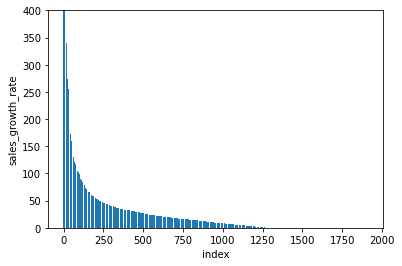

In [678]:
import matplotlib.pyplot as plt
plt.cla() # plt 초기화
plt.bar(df_plot.index.values, df_plot['sales_growth_rate'].values)
# plt.hist(df_plot['sales_growth_rate'].values, bins = 20)
plt.xlabel('index')
plt.ylabel('sales_growth_rate')
plt.ylim(0,400)  # Y축의 범위
plt.show()

In [679]:
# net_profit_growth_rate 높은 순으로 정렬
df_plot = df_ce.sort_values(by='net_profit_growth_rate', ascending=False) 
df_plot = df_plot.reset_index()

In [680]:
df_plot

,index,company_name,ticker,fiscal_year,sales_growth_rate,net_profit_growth_rate,operating_profit_rate,roe,roa,debt_ratio,tbp,equity_capital,Close_ratio
0,1351,부국철강(주),026940,1.0,49.26,56335.64000,5.65,5.03,4.41,8.06,0.00,0.0,13.738739
1,396,(주)솔본,035610,1.0,10.79,30495.19000,-12.47,12.28,12.06,0.13,0.00,0.0,84.347826
2,1405,상신이디피(주),091580,1.0,42.62,27761.21000,5.82,6.86,3.19,-26.65,-11.64,334088.0,95.475598
3,125,(주)대창,012800,1.0,58.44,11804.72000,4.70,4.64,1.77,25.05,1.60,0.0,112.552301
4,1054,(주)한국전자홀딩스,006200,1.0,246.39,9291.18000,76.06,4.21,4.10,0.35,-0.05,0.0,174.725275
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1906,1446,신원종합개발(주),017000,1.0,-10.35,-96.89000,-0.68,-2.65,-1.27,5.64,-6.47,6000000.0,168.282596
1907,23,(주)경보제약,214390,1.0,-19.86,-97.97000,-5.84,-4.27,-2.63,-8.81,-0.27,0.0,47.414741
1908,995,(주)파커스,065690,1.0,-7.40,-98.02000,-15.65,-1.95,-1.64,52.16,27.30,42911.0,56.048387
1909,1902,(주)양지사,030960,1.0,-9.11,-98.90748,-8.03,-93.24,-73.11,-15.35,1.00,0.0,38.341969


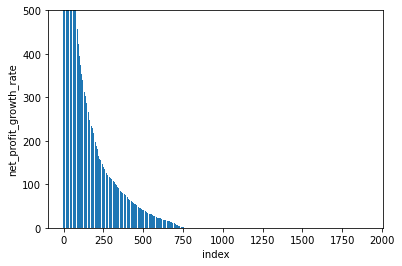

In [681]:
plt.cla()
plt.bar(df_plot.index.values, df_plot['net_profit_growth_rate'].values)
plt.xlabel('index')
plt.ylabel('net_profit_growth_rate')
plt.ylim(0,500)  # Y축의 범위
plt.show()

In [682]:
len(df_ce.index)

1911

In [683]:
df_ce_hm= df_ce[['sales_growth_rate','net_profit_growth_rate','operating_profit_rate',
                        'roe','roa','debt_ratio','tbp','equity_capital','Close_ratio']]

<AxesSubplot:>

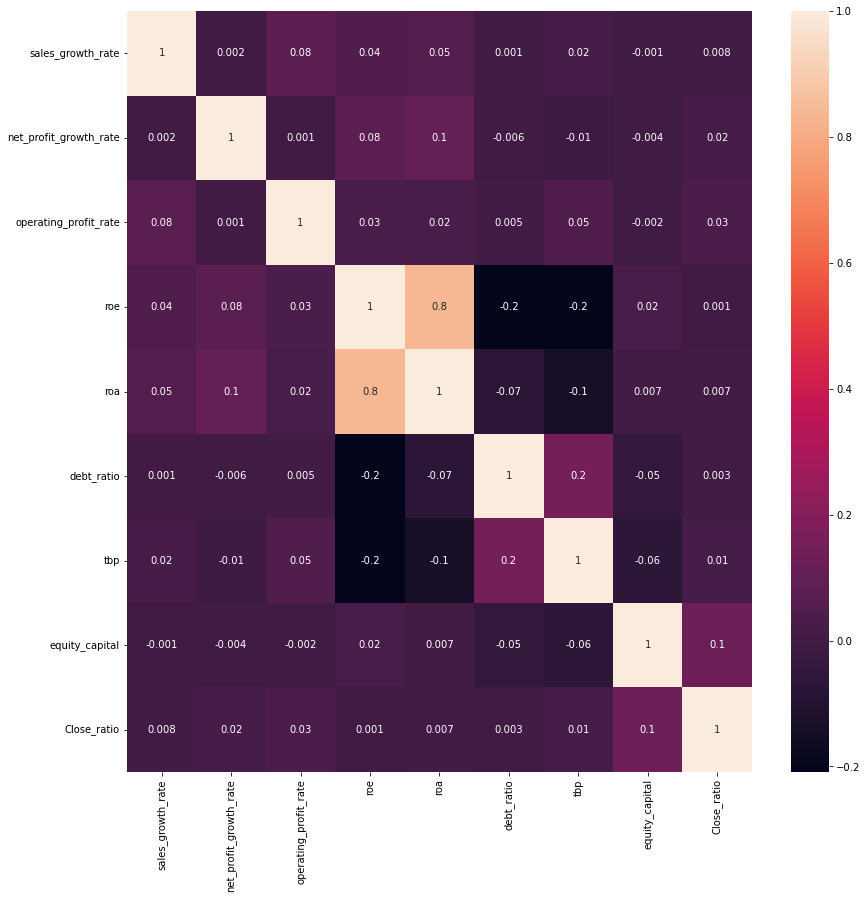

In [685]:
corr1 = df_ce_hm.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr1,annot=True, fmt='.1g')

In [686]:
# 점수 매기기
df_ce_num=pd.DataFrame()
for i in range(len(df_ce.index)):
    ce_num =df_ce[df_ce.index==i]
    
    # 매출액 sales_growth_rate
    if ce_num["sales_growth_rate"].values > 0:
        sgr = 2
    elif ce_num["sales_growth_rate"].values == 0:
        sgr = 1
    else :
        sgr = 0
    # 순이익 net_profit_growth_rate
    if ce_num["net_profit_growth_rate"].values > 0:
        npgr = 2
    elif ce_num["net_profit_growth_rate"].values == 0:
        npgr = 1
    else :
        npgr = 0
        
    # 매출액정상영업이익률 operating_profit_rate
    if ce_num["operating_profit_rate"].values > 0:
        opr = 2
    elif ce_num["operating_profit_rate"].values == 0:
        opr = 1
    else :
        opr = 0 
        
    #자기자본순이익률 roe 
    if ce_num["roe"].values > 0:
        roe = 2
    elif ce_num["roe"].values == 0:
        roe = 1
    else :
        roe = 0
        
    #총자본순이익률 roa
    if ce_num["roa"].values > 0:
        roa = 2
    elif ce_num["roa"].values == 0:
        roa = 1
    else :
        roa = 0
            
    #부채비율 debt_ratio 
    if ce_num["debt_ratio"].values > 0:
        d_r = 0
    elif ce_num["debt_ratio"].values == 0:
        d_r = 1
    else :
        d_r = 2
              
    #차입금의존도 tbp
    if ce_num["tbp"].values > 0:
        tbp = 0
    elif ce_num["tbp"].values == 0:
        tbp = 1
    else :
        tbp = 2
    
    # 자본금  equity_capital
    if ce_num["equity_capital"].values > 0:
        e_c = 2
    elif ce_num["equity_capital"].values == 0:
        e_c = 1
    else :
        e_c = 0
    

    df_ce_num = df_ce_num.append({'company_name': ce_num['company_name'].values[0],'ticker': ce_num['ticker'].values[0] ,
                  'sales_growth_rate': sgr ,'net_profit_growth_rate': npgr,'operating_profit_rate': opr,
                  'roe': roe,'roa': roa,'debt_ratio': d_r,'tbp': tbp,'equity_capital': e_c, 
                                 'Close_ratio' : ce_num['Close_ratio'].values[0] }, ignore_index=True )

In [687]:
df_ce_num

,company_name,ticker,sales_growth_rate,net_profit_growth_rate,operating_profit_rate,roe,roa,debt_ratio,tbp,equity_capital,Close_ratio
0,(주)BNK금융지주,138930,2.0,2.0,2.0,2.0,2.0,0.0,1.0,1.0,54.600000
1,(주)CMG제약,058820,2.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,32.578616
2,(주)DB하이텍,000990,2.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,116.291161
3,(주)ES큐브,050120,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,6.779052
4,(주)JB금융지주,175330,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,58.860759
...,...,...,...,...,...,...,...,...,...,...,...
1906,(주)형지엘리트,093240,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,434.928230
1907,만호제강(주),001080,0.0,2.0,2.0,2.0,2.0,0.0,1.0,1.0,68.014706
1908,메이슨캐피탈(주),021880,0.0,1.0,0.0,0.0,0.0,2.0,2.0,2.0,230.097977
1909,신성통상(주),005390,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,111.461318


In [688]:
df_ce_num_hm= df_ce_num[['sales_growth_rate','net_profit_growth_rate','operating_profit_rate',
                        'roe','roa','debt_ratio','tbp','Close_ratio']] #'equity_capital'

In [689]:
df_ce_num_hm

,sales_growth_rate,net_profit_growth_rate,operating_profit_rate,roe,roa,debt_ratio,tbp,Close_ratio
0,2.0,2.0,2.0,2.0,2.0,0.0,1.0,54.600000
1,2.0,0.0,0.0,0.0,0.0,2.0,2.0,32.578616
2,2.0,0.0,0.0,0.0,0.0,2.0,2.0,116.291161
3,2.0,1.0,2.0,2.0,2.0,2.0,2.0,6.779052
4,2.0,2.0,2.0,2.0,2.0,2.0,1.0,58.860759
...,...,...,...,...,...,...,...,...
1906,0.0,1.0,0.0,0.0,2.0,0.0,0.0,434.928230
1907,0.0,2.0,2.0,2.0,2.0,0.0,1.0,68.014706
1908,0.0,1.0,0.0,0.0,0.0,2.0,2.0,230.097977
1909,2.0,2.0,2.0,2.0,2.0,2.0,2.0,111.461318


<AxesSubplot:>

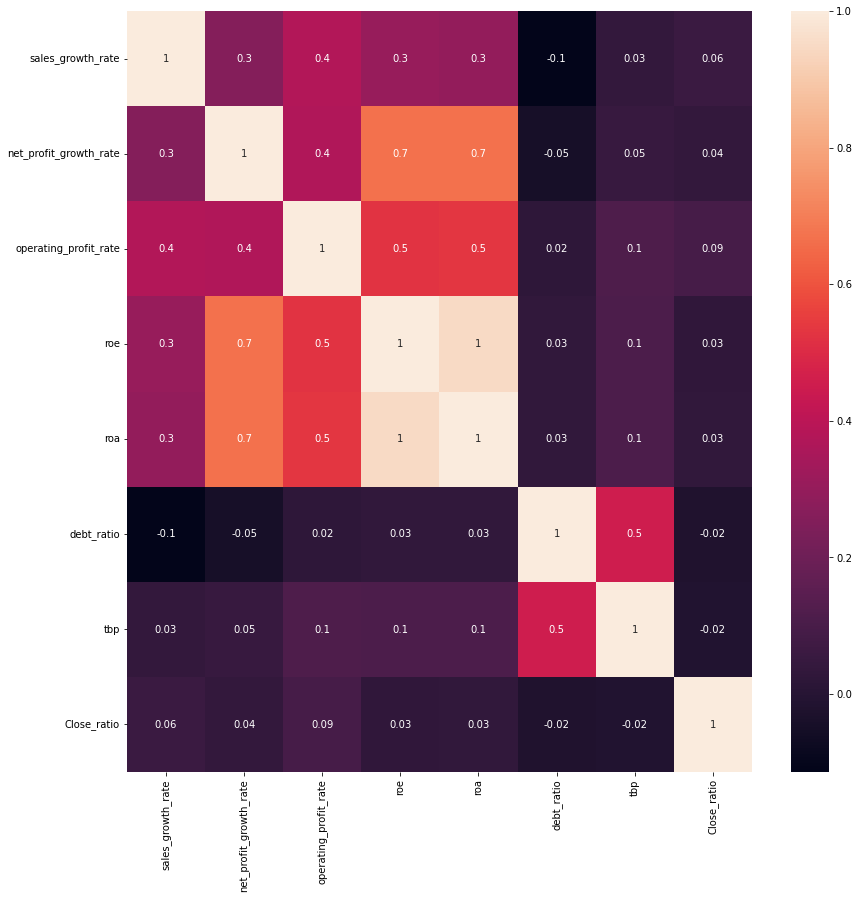

In [690]:
corr = df_ce_num_hm.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr,annot=True, fmt='.1g')